# Data Visualization

In this lesson we will learn the basics of Data Visualization by analyzing a popular dataset from Meta Kaggle [meta-kaggle](https://www.kaggle.com/kaggle/meta-kaggle).

<img src='figures/Data-Visualization.jpg' width=500>


## Loading Packages

In [1]:
# Let's make sure the libraries are installed
#!pip install numpy
#!pip install plotly
#!pip install bokeh
#!pip install sklearn
#!pip install matplotlib
#!pip install seaborn
#!pip install pandas
#!pip install mpl_toolkits

# Now import the libraries
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from bokeh.io import push_notebook, show, output_notebook
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
import matplotlib.animation as animation
from matplotlib.figure import Figure
from sklearn.cluster import KMeans
import plotly.figure_factory as ff
import matplotlib.pylab as pylab
from ipywidgets import interact
import plotly.graph_objs as go
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from sklearn  import datasets
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

from sklearn import datasets
import plotly.offline as py
from random import randint
from plotly import tools
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import string
import numpy
import csv
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))

#print('wordcloud: {}'.format(wordcloud.version))

matplotlib: 3.0.3
seaborn: 0.9.0
pandas: 0.24.2
numpy: 1.16.2


A few tiny adjustments for better **code readability**

In [3]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

## Data Collection
**Data collection** is the process of gathering and measuring data.

<img src='figures/data-collection.jpg' width=300>

Lets start by putting the datasets into **Pandas DataFrames**

In [4]:
# import kernels and users to play with it
#command--> 1
users = pd.read_csv("data/kaggle_Users.csv")
kernels = pd.read_csv("data/kaggle_Kernels.csv")
messages = pd.read_csv("data/kaggle_ForumMessages.csv")


**Note**
* Each row is an observation (also known as : sample, example, instance, record)
* Each column is a feature (also known as: Predictor, attribute, Independent Variable, input, regressor, Covariate)

In [5]:
#command--> 2
users.sample(1) 

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
1107628,1234771,pyakovlev,Pavel Yakovlev,08/27/2017,0


Select a random userid from the dataset to use for the experiment.

In [6]:
username="mjbahmani"
userid=int(users[users['UserName']=="mjbahmani"].Id)
userid

1840354

We can just use **dropna()** (be careful sometimes you should not do this!)

In [7]:
# remove rows that have NA's
print('Before Droping',messages.shape)
#command--> 3
messages = messages.dropna()
print('After Droping',messages.shape)

Before Droping (459670, 8)
After Droping (37515, 8)


## Features
Features can be from following types:
1. numeric
1. categorical
1. ordinal
1. datetime
1. coordinates

Grab some information about the dataset:

In [8]:
#command--> 4
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023625 entries, 0 to 3023624
Data columns (total 5 columns):
Id                 int64
UserName           object
DisplayName        object
RegisterDate       object
PerformanceTier    int64
dtypes: int64(2), object(3)
memory usage: 115.3+ MB
None


## Explor the Dataset
1. Dimensions of the dataset.
1. Peek at the data itself.
1. Statistical summary of all attributes.
1. Breakdown of the data by the class variable.

In [9]:
# shape
#command--> 5
print(users.shape)

(3023625, 5)


In [10]:
#columns*rows
#command--> 6
users.size

15118125


We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

You see number of unique item for Species with command below:

In [11]:
#command--> 7
kernels['Medal'].unique()

array([nan,  3.,  2.,  1.])

In [12]:
#command--> 8
kernels["Medal"].value_counts()


3.0    7575
2.0    1877
1.0     992
Name: Medal, dtype: int64

Check the first 5 rows of the data set:

In [13]:
kernels.head(5) 

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes
0,1,2505,205.0,NaN,NaN,1.0,03/25/2015 18:25:32,03/23/2018,03/25/2015,False,hello,NaN,NaN,44,0,0
1,2,3716,1748.0,NaN,26670.0,2.0,03/25/2015 18:31:07,04/16/2015,03/25/2015,False,rf-proximity,3.0,07/15/2016,7706,1,13
2,4,3716,41.0,NaN,NaN,9.0,03/25/2015 21:57:36,03/23/2018,03/25/2015,False,r-version,NaN,NaN,20,0,0
3,5,28963,19.0,NaN,NaN,13.0,03/25/2015 22:01:04,03/23/2018,03/25/2015,False,test1,NaN,NaN,25,0,0
4,6,3716,21.0,NaN,NaN,15.0,03/25/2015 22:19:00,03/23/2018,03/25/2015,False,are-icons-missing,NaN,NaN,16,0,0


Check the last 5 rows of the data set:

In [14]:
#command--> 9
users.tail() 

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
3023620,3267210,doodslag,doodslag,05/24/2019,0
3023621,3267211,sdfffds,Aaa AAA,05/24/2019,0
3023622,3267212,chinnoppanat,chineiei,05/24/2019,0
3023623,3267213,kameel2311,Kameel Amareen,05/24/2019,0
3023624,3267214,aaa203719,Dmitry,05/24/2019,0


Check 5 random rows from the data set:

In [15]:
kernels.sample(5) 

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes
191004,1711674,2080166,5929994.0,NaN,NaN,5929994.0,09/23/2018 13:19:58,09/23/2018,NaN,False,starter-wine-snob-1068feb2-b,NaN,NaN,10,0,0
199261,1949961,2395194,6805119.0,3833259.0,NaN,6786292.0,10/25/2018 10:58:38,10/26/2018,10/26/2018,False,data-types-and-missing-data-workbook,NaN,NaN,6,0,0
4864,18479,371651,77014.0,76929.0,17127.0,76931.0,09/29/2015 13:52:55,09/29/2015,09/29/2015,False,10-most-used-ingredients-by-cuisine,NaN,NaN,2733,1,4
162272,780710,1085490,2960986.0,2945378.0,NaN,2956621.0,03/27/2018 14:05:04,03/27/2018,03/27/2018,False,data-cleaning-challenge-scale-and-normalize-data,NaN,NaN,53,0,1
1765,7701,3716,20648.0,NaN,NaN,20648.0,07/07/2015 13:47:20,07/07/2015,07/07/2015,False,r-template,NaN,NaN,221,0,0


Statistical summary of the dataset:

In [16]:
kernels.describe() 

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,Medal,TotalViews,TotalComments,TotalVotes
count,2.419560e+05,2.419560e+05,2.044130e+05,7.134700e+04,22255.000000,2.403180e+05,10444.000000,2.419560e+05,241956.000000,241956.000000
mean,8.503644e+05,9.878120e+05,3.632660e+06,2.141650e+06,54921.843586,3.102508e+06,2.630314,3.838757e+02,0.623394,2.364579
std,1.091341e+06,7.233939e+05,4.087210e+06,2.836515e+06,21952.199456,3.879372e+06,0.650403,5.514403e+03,6.575731,28.192972
min,1.000000e+00,3.680000e+02,1.900000e+01,1.000000e+00,14433.000000,1.000000e+00,1.000000,0.000000e+00,0.000000,0.000000
25%,1.044458e+05,4.621950e+05,6.421520e+05,3.265290e+05,35837.500000,3.902452e+05,2.000000,1.700000e+01,0.000000,0.000000
50%,2.384515e+05,7.758730e+05,1.235206e+06,8.064090e+05,55612.000000,1.088644e+06,3.000000,3.400000e+01,0.000000,0.000000
75%,1.407120e+06,1.383222e+06,5.906639e+06,2.983186e+06,73565.000000,4.937430e+06,3.000000,1.170000e+02,0.000000,0.000000
max,4.011726e+06,3.265550e+06,1.462577e+07,1.461933e+07,93213.000000,1.462431e+07,3.000000,2.090103e+06,935.000000,4430.000000


## Find yourself in Users dataset

In [17]:
users[users['Id']==userid]

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
1680173,1840354,mjbahmani,MJ Bahmani,04/20/2018,4


## Find your kernels in Kernels dataset

In [18]:
yourkernels=kernels[kernels['AuthorUserId']==userid]
yourkernels

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes
187155,1594170,1840354,10604276.0,NaN,66867.0,5559571.0,09/07/2018 07:43:29,02/16/2019,09/25/2018,False,a-comprehensive-ml-workflow-with-python,1.0,10/13/2018,44579,271,842
192882,1778622,1840354,9589450.0,NaN,68065.0,6312298.0,10/02/2018 13:20:23,01/16/2019,10/09/2018,False,10-steps-to-become-a-data-scientist,1.0,11/15/2018,22788,131,485
193406,1791166,1840354,9252125.0,6153549.0,67864.0,6248131.0,10/04/2018 03:10:02,01/06/2019,10/06/2018,False,ds-workflow-for-hp-10-ml-algorithms-12-plot,1.0,04/17/2019,15310,72,195
194048,1808203,1840354,10849843.0,NaN,67862.0,6247406.0,10/06/2018 12:31:03,02/24/2019,10/06/2018,False,linear-algebra-for-data-scientists,1.0,11/21/2018,23388,50,339
195581,1847773,1840354,10851194.0,NaN,68412.0,6412791.0,10/11/2018 09:26:49,02/24/2019,10/12/2018,False,top-5-deep-learning-frameworks-tutorial,1.0,12/05/2018,11438,46,175
196845,1875944,1840354,10822188.0,NaN,68625.0,6496124.0,10/15/2018 09:48:31,02/23/2019,10/15/2018,False,the-data-scientist-s-toolbox-tutorial-2,1.0,12/31/2018,14088,49,210
197403,1890271,1840354,10849027.0,NaN,68827.0,6552283.0,10/17/2018 06:15:22,02/24/2019,10/17/2018,False,the-data-scientist-s-toolbox-tutorial-1,1.0,11/15/2018,38103,127,598
197922,1903816,1840354,10812811.0,NaN,69114.0,6605349.0,10/18/2018 21:48:53,02/23/2019,10/19/2018,False,20-ml-algorithms-15-plot-for-beginners,1.0,12/17/2018,14331,69,272
198427,1919205,1840354,10851880.0,NaN,69251.0,6678798.0,10/21/2018 10:18:38,02/24/2019,10/21/2018,False,top-5-data-visualization-libraries-tutorial,1.0,01/27/2019,8656,46,123
200523,2000640,1840354,11222097.0,NaN,70330.0,6998053.0,11/01/2018 08:05:02,03/06/2019,11/01/2018,False,tutorial-on-ensemble-learning-don-t-overfit,1.0,03/07/2019,14912,44,188


## Data Visualization Libraries
Before we start, lets look at 10 **Python data visualization libraries**.

1. **matplotlib**
matplotlib is arguably the best Python data visualization library. 
Despite being over a decade old, it’s still the most widely used library for plotting in the Python community. 
It was designed to closely resemble MATLAB, a proprietary programming language.

1. **Seaborn**
Seaborn harnesses the power of matplotlib to create beautiful charts in a few lines of code. 
The key difference is Seaborn’s default styles and color palettes, which are designed to be more aesthetically pleasing and modern. 
Since Seaborn is built on top of matplotlib, you’ll need to know matplotlib to tweak Seaborn’s defaults.

1. **ggplot**
ggplot is based on ggplot2, an R plotting system, and concepts from The Grammar of Graphics. ggplot operates differently than matplotlib: it lets you layer components to create a complete plot. 
For example, you can start with axes, then add points, then a line, a trendline, etc. 
Although The Grammar of Graphics has been praised as an “intuitive” method for plotting, seasoned matplotlib users might need time to adjust to this new mindset.


1. **Bokeh**
Like ggplot, Bokeh is based on The Grammar of Graphics, but unlike ggplot, it’s native to Python, not ported over from R. 
Its strength lies in the ability to create interactive, web-ready plots, which can be easily outputted as JSON objects, HTML documents, or interactive web applications. 
Bokeh also supports streaming and real-time data.


1. **pygal**
Like Bokeh and Plotly, pygal offers interactive plots that can be embedded in the web browser. 
Its prime differentiator is the ability to output charts as SVGs. 
As long as you’re working with smaller datasets, SVGs will do you just fine. 
But if you’re making charts with hundreds of thousands of data points, they’ll have trouble rendering and become sluggish.

1. **Plotly**
You might know Plotly as an online platform for data visualization, but did you also know you can access its capabilities from a Python notebook? 
Like Bokeh, Plotly’s forte is making interactive plots, but it offers some charts you won’t find in most libraries, like contour plots, dendograms, and 3D charts.

1. **geoplotlib**
geoplotlib is a toolbox for creating maps and plotting geographical data. 
You can use it to create a variety of map-types, like choropleths, heatmaps, and dot density maps. 
You must have Pyglet (an object-oriented programming interface) installed to use geoplotlib. 
Nonetheless, since most Python data visualization libraries don’t offer maps, it’s nice to have a library dedicated solely to them.

1. **Gleam**
Gleam is inspired by R’s Shiny package. It allows you to turn analyses into interactive web apps using only Python scripts, so you don’t have to know any other languages like HTML, CSS, or JavaScript. 
Gleam works with any Python data visualization library. Once you’ve created a plot, you can build fields on top of it so users can filter and sort data.


1. **missingno**
Dealing with missing data is a pain. 
missingno allows you to quickly gauge the completeness of a dataset with a visual summary, instead of trudging through a table. 
You can filter and sort data based on completion or spot correlations with a heatmap or a dendrogram.


1. **Leather**
Leather’s creator, Christopher Groskopf, puts it best: “Leather is the Python charting library for those who need charts now and don’t care if they’re perfect.” 
It’s designed to work with all data types and produces charts as SVGs, so you can scale them without losing image quality. 
Since this library is relatively new, some of the documentation is still in progress. The charts you can make are pretty basic—but that’s the intention.


1. **Chartify**
Chartify is a Python library that makes it easy for data scientists to create charts.
Why use Chartify?
    * Consistent input data format: Spend less time transforming data to get your charts to work. All plotting functions use a consistent tidy input data format.
    * Smart default styles: Create pretty charts with very little customization required.
    * Simple API: We've attempted to make to the API as intuitive and easy to learn as possible.
    * Flexibility: Chartify is built on top of Bokeh, so if you do need more control you can always fall back on Bokeh's API.

## Matplotlib

This Matplotlib tutorial takes you through the basics Python data visualization: 
1. the anatomy of a plot 
1. pyplot 
1. pylab
1. and much more

You can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands. 

`%matplotlib notebook` provides an interactive environment.

We can use html cell magic to display the image.

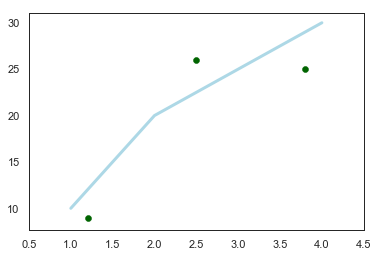

In [19]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.4, 3.8, 1.2, 2.5], [15, 25, 9, 26], color='darkgreen', marker='o')
plt.xlim(0.5, 4.5)
plt.show()

Simple and powerful visualizations can be generated using the **Matplotlib Python** Library. More than a decade old, it is the most widely-used library for plotting in the Python community. A wide range of graphs from histograms to heat plots to line plots can be plotted using Matplotlib.

Many other libraries are built on top of Matplotlib and are designed to work in conjunction with analysis, it being the first Python data visualization library. Libraries like pandas and matplotlib are “wrappers” over Matplotlib allowing access to a number of Matplotlib’s methods with less code.

## Scatterplots

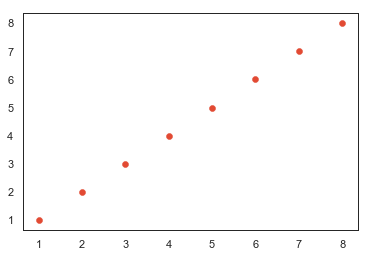

In [20]:
x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

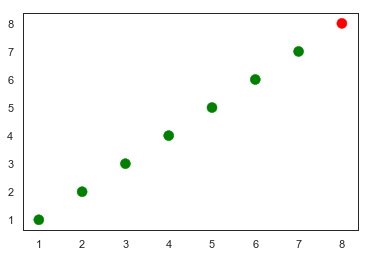

In [21]:
x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

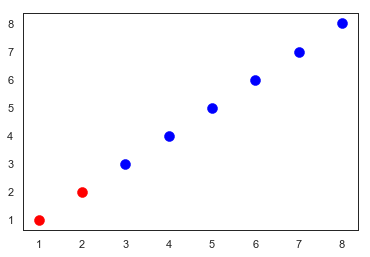

In [22]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

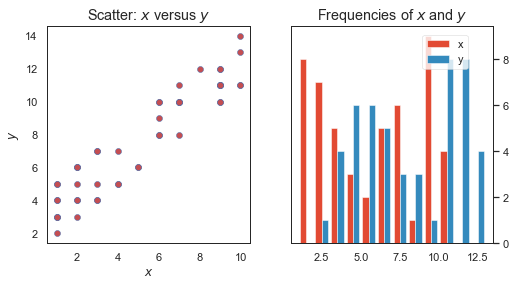

In [23]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

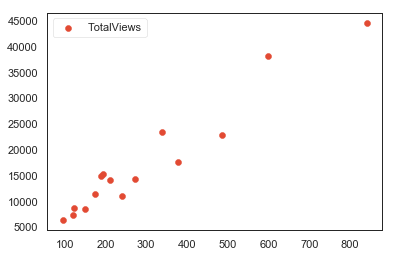

In [24]:
# Modify the graph above by assigning each species an individual color.
#command--> 19
x=yourkernels["TotalVotes"]
y=yourkernels["TotalViews"]
plt.scatter(x, y)
plt.legend()
plt.show()


## Line Plots

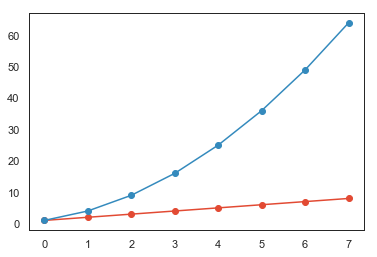

In [25]:
linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')

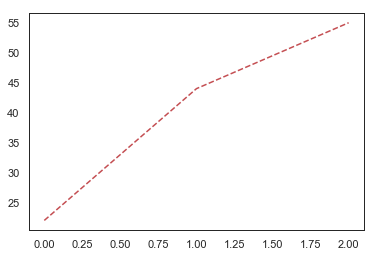

In [26]:
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

## Bar Charts

<BarContainer object of 8 artists>

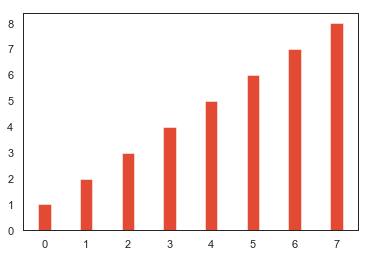

In [27]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

<BarContainer object of 8 artists>

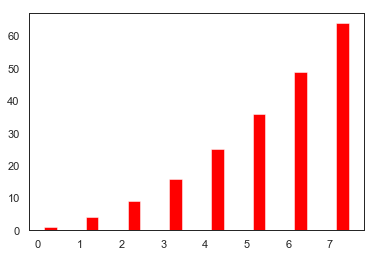

In [28]:
new_xvals = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)

plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

<BarContainer object of 8 artists>

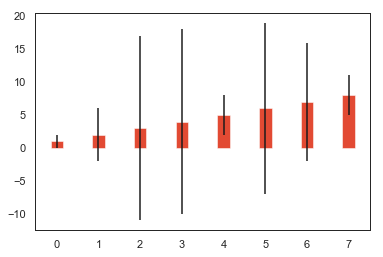

In [29]:
linear_err = [randint(0,15) for x in range(len(linear_data))] 

# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<BarContainer object of 8 artists>

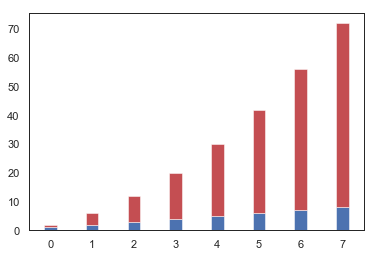

In [30]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

<BarContainer object of 8 artists>

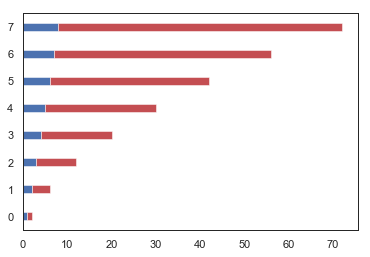

In [31]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

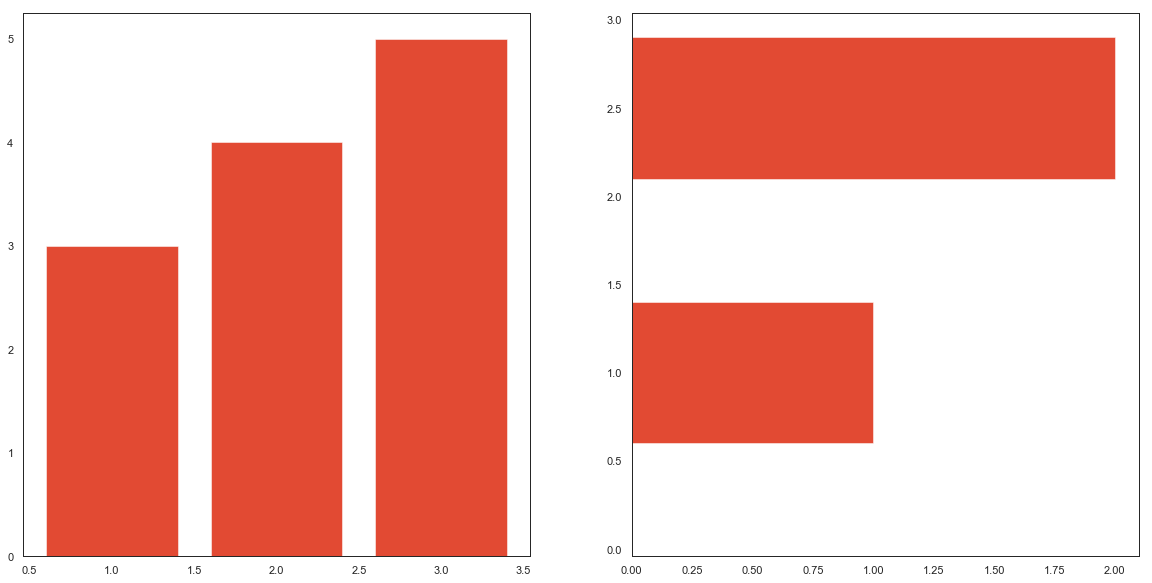

In [32]:
# Initialize the plot
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# or replace the three lines of code above by the following line: 
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

# Plot the data
ax1.bar([1,2,3],[3,4,5])
ax2.barh([0.5,1,2.5],[0,1,2])

# Show the plot
plt.show()

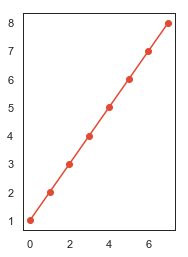

In [33]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

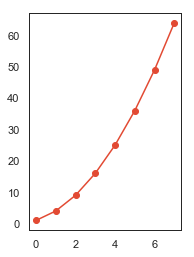

In [34]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

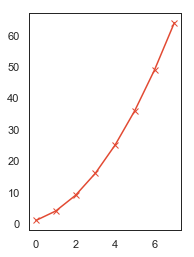

In [35]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

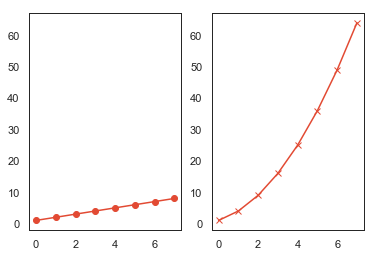

In [36]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

## Histograms

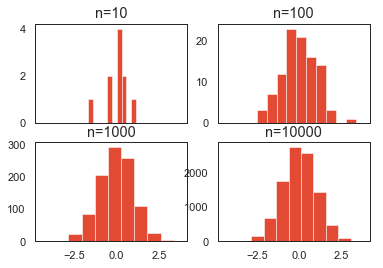

In [37]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

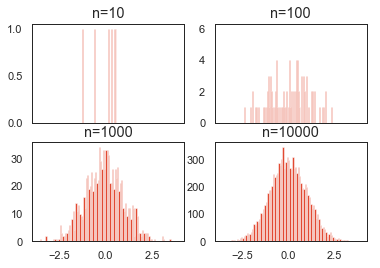

In [38]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

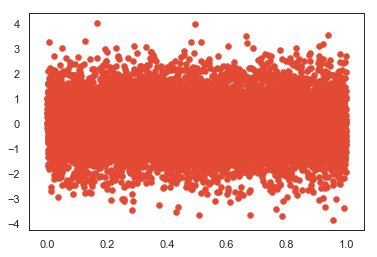

In [39]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.



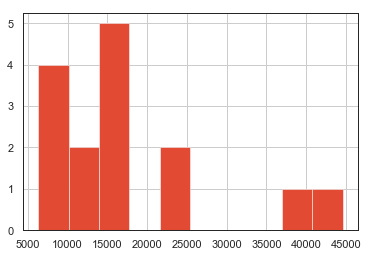

In [40]:
yourkernels["TotalViews"].hist();

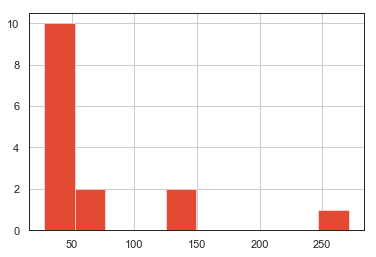

In [41]:
yourkernels["TotalComments"].hist();

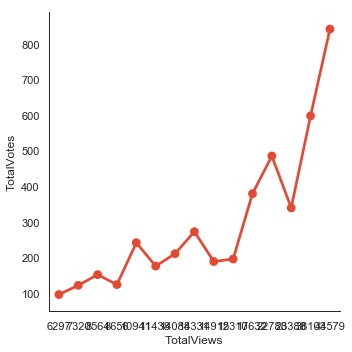

In [42]:
sns.factorplot('TotalViews','TotalVotes',data=yourkernels)
plt.show()

## Box and Whisker Plots
In descriptive statistics, a **box plot** or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

In [43]:

normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

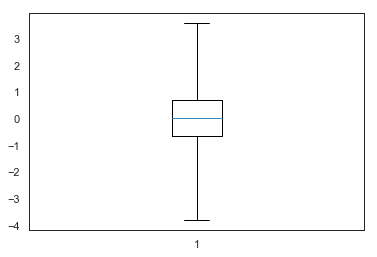

In [44]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

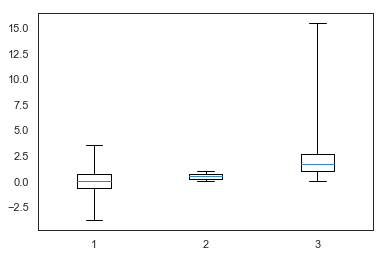

In [45]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

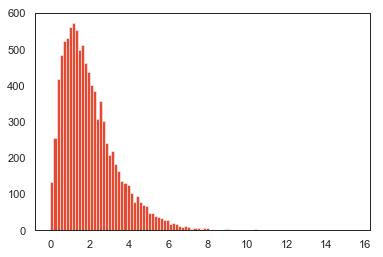

In [46]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

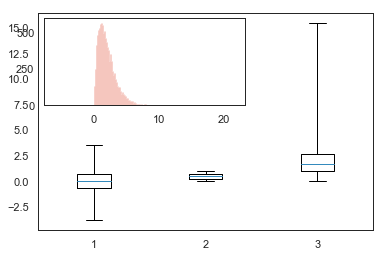

In [47]:
plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [48]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

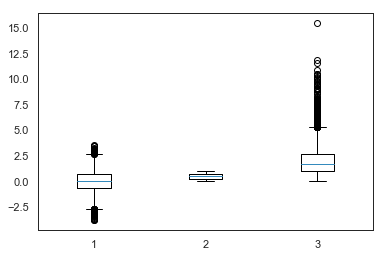

In [49]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

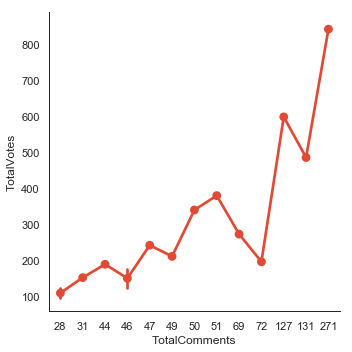

In [50]:
sns.factorplot('TotalComments','TotalVotes',data=yourkernels)
plt.show()

## Heatmaps

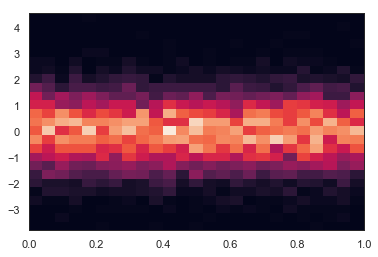

In [51]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

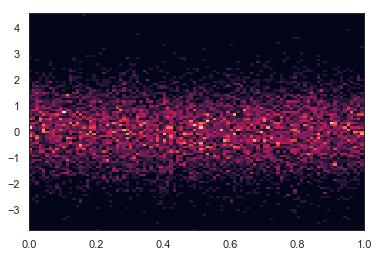

In [52]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

## Animations

In [53]:
n = 100
x = np.random.randn(n)

In [54]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

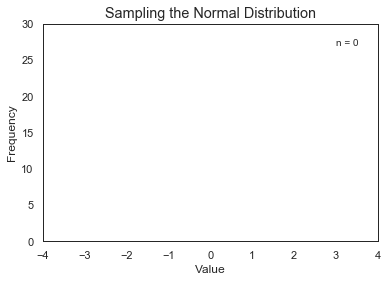

In [55]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

## Interactivity

4

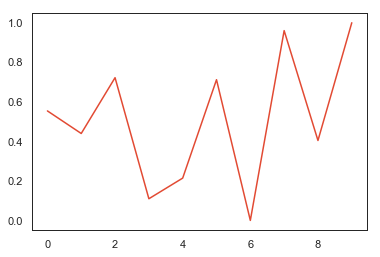

In [56]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [57]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.934972,0.469117,Canada
1,0.487075,0.356117,UK
2,0.373618,0.526816,China
3,0.291737,0.636494,Mexico
4,0.613179,0.146407,Brazil
5,0.612451,0.428726,Chile
6,0.491694,0.911174,USA
7,0.096352,0.673622,Germany
8,0.529927,0.707035,India
9,0.514237,0.918630,Iraq


Text(0.5, 0, 'Height')

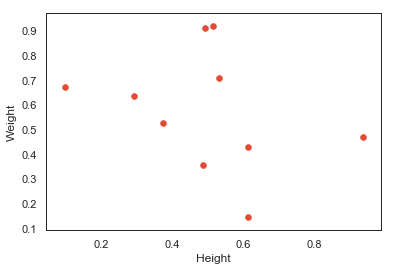

In [58]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [59]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

4

<Figure size 432x288 with 0 Axes>

In [60]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

## DataFrame.plot

In [61]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


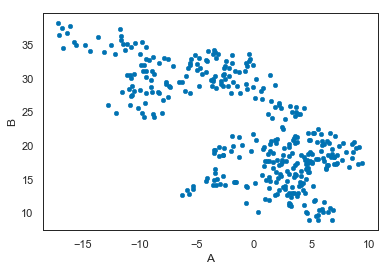

In [62]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

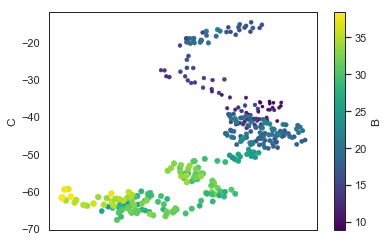

In [63]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

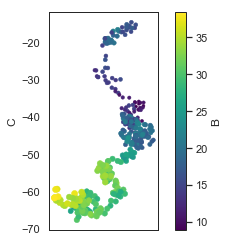

In [64]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

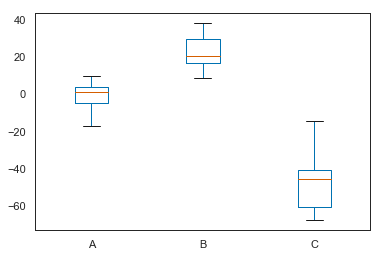

In [65]:
df.plot.box();

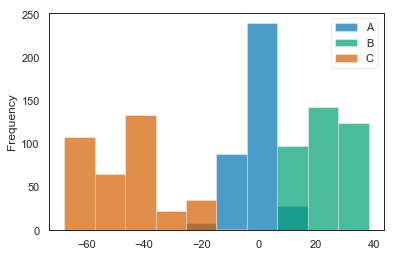

In [66]:
df.plot.hist(alpha=0.7);

Kernel density estimation plots are useful for deriving a smooth continuous function from a given sample.

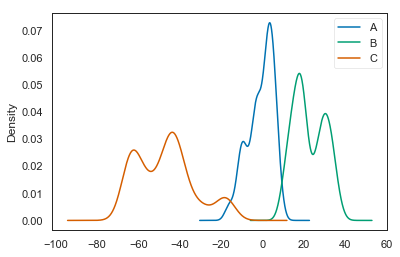

In [67]:
df.plot.kde();

# Seaborn
Seaborn is an open source, BSD-licensed Python library providing high level API for visualizing the data using Python programming language.

## 5-1 Seaborn vs. Matplotlib

If Matplotlib “tries to make easy things easy and hard things possible”, Seaborn tries to make a well defined set of hard things easy too.”

Seaborn helps resolve the two major problems faced by Matplotlib; the problems are
* Default Matplotlib parameters
* Working with data frames

As Seaborn compliments and extends Matplotlib, the learning curve is quite gradual. 
If you know Matplotlib, you are already half way through Seaborn.

### Important Features of Seaborn
Seaborn is built on top of Python’s core visualization library Matplotlib. 
It is meant to serve as a complement, and not a replacement. 
However, Seaborn comes with some very important features. 
Let us see a few of them here. The features help in −
* Built in themes for styling matplotlib graphics
* Visualizing univariate and bivariate data
* Fitting in and visualizing linear regression models
* Plotting statistical time series data
* Seaborn works well with NumPy and Pandas data structures
* It comes with built in themes for styling Matplotlib graphics

In most cases, you will still use Matplotlib for simple plotting. The knowledge of Matplotlib is recommended to tweak Seaborn’s default plots.

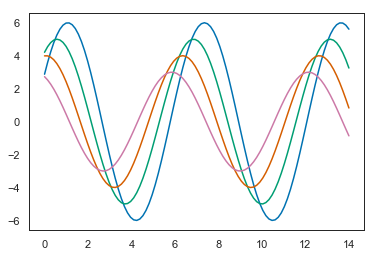

In [68]:
def sinplot(flip = 1):
   x = np.linspace(0, 14, 100)
   for i in range(1, 5): 
      plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()
plt.show()

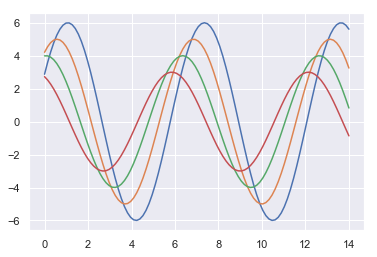

In [69]:
def sinplot(flip = 1):
   x = np.linspace(0, 14, 100)
   for i in range(1, 5):
      plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
 
sns.set()
sinplot()
plt.show()

In [70]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

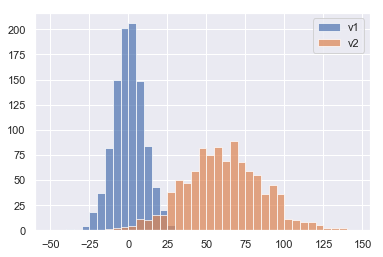

In [71]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

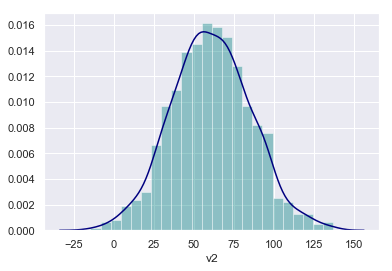

In [72]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v2, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

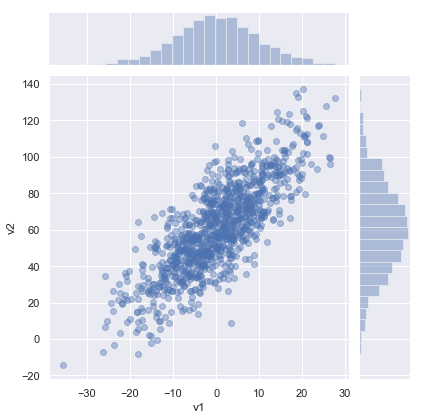

In [73]:
sns.jointplot(v1, v2, alpha=0.4);

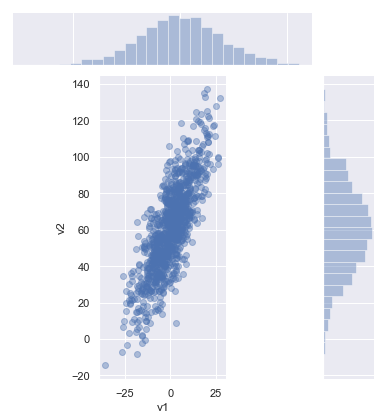

In [74]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

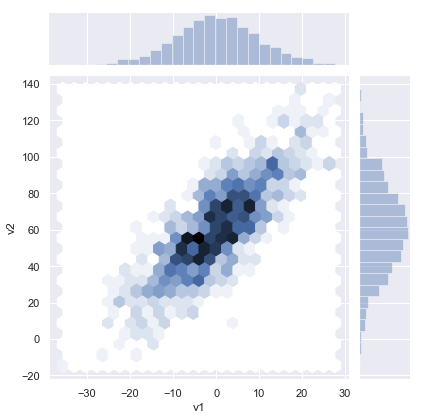

In [75]:
sns.jointplot(v1, v2, kind='hex');

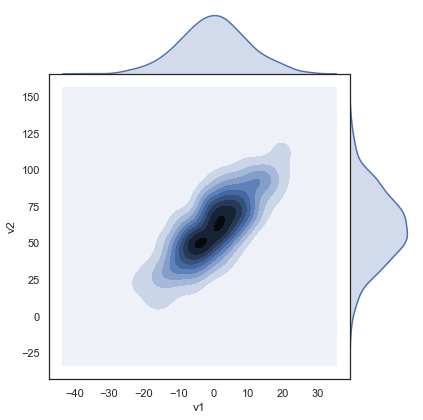

In [76]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

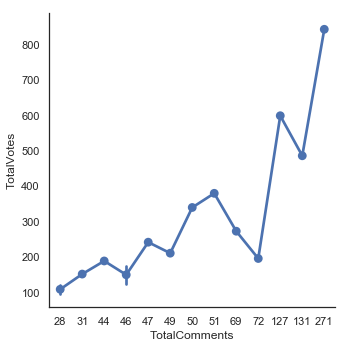

In [77]:
sns.factorplot('TotalComments','TotalVotes',data=yourkernels)
plt.show()

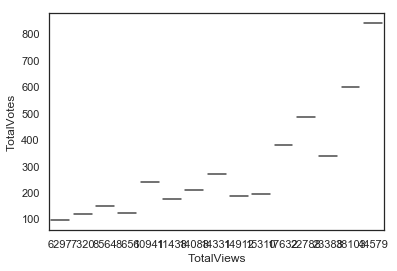

In [78]:
# violinplots on petal-length for each species
#command--> 24
sns.violinplot(data=yourkernels,x="TotalViews", y="TotalVotes")

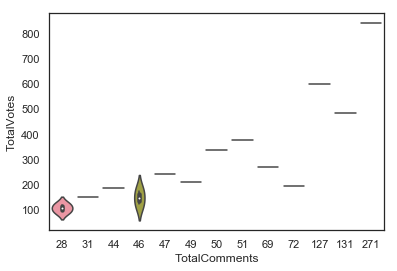

In [79]:
# violinplots on petal-length for each species
sns.violinplot(data=yourkernels,x="TotalComments", y="TotalVotes")

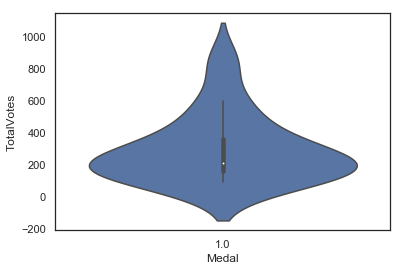

In [80]:
sns.violinplot(data=yourkernels,x="Medal", y="TotalVotes")

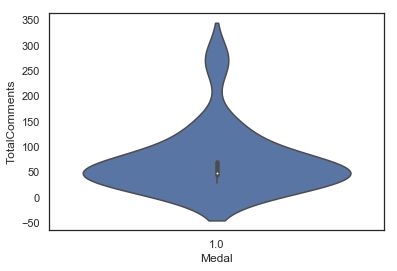

In [81]:
sns.violinplot(data=yourkernels,x="Medal", y="TotalComments")

How many NA elements in every column.


##  kdeplot

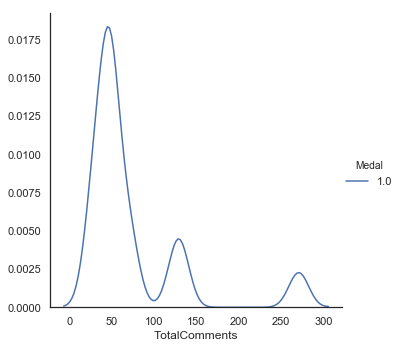

In [82]:
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used
#command--> 25
sns.FacetGrid(yourkernels, hue="Medal", size=5).map(sns.kdeplot, "TotalComments").add_legend()
plt.show()

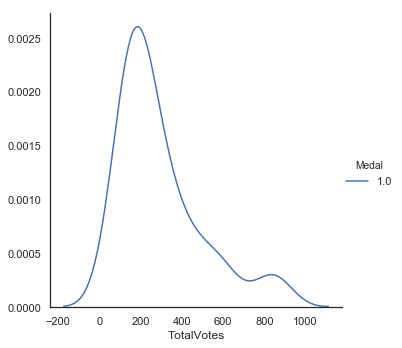

In [83]:
sns.FacetGrid(yourkernels, hue="Medal", size=5).map(sns.kdeplot, "TotalVotes").add_legend()
plt.show()

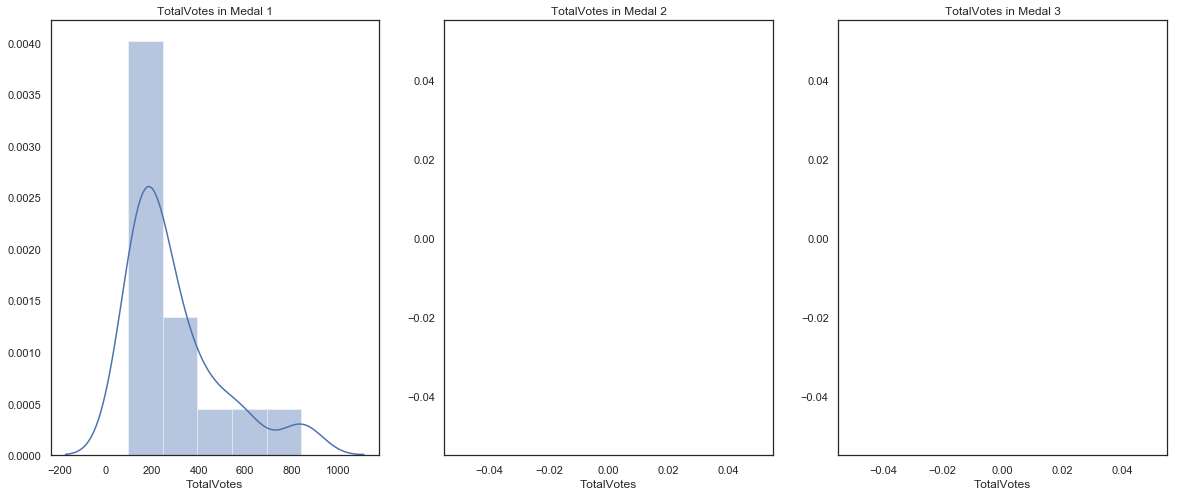

In [84]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(yourkernels[yourkernels['Medal']==1].TotalVotes,ax=ax[0])
ax[0].set_title('TotalVotes in Medal 1')
sns.distplot(yourkernels[yourkernels['Medal']==2].TotalVotes,ax=ax[1])
ax[1].set_title('TotalVotes in Medal 2')
sns.distplot(yourkernels[yourkernels['Medal']==3].TotalVotes,ax=ax[2])
ax[2].set_title('TotalVotes in Medal 3')
plt.show()

## jointplot

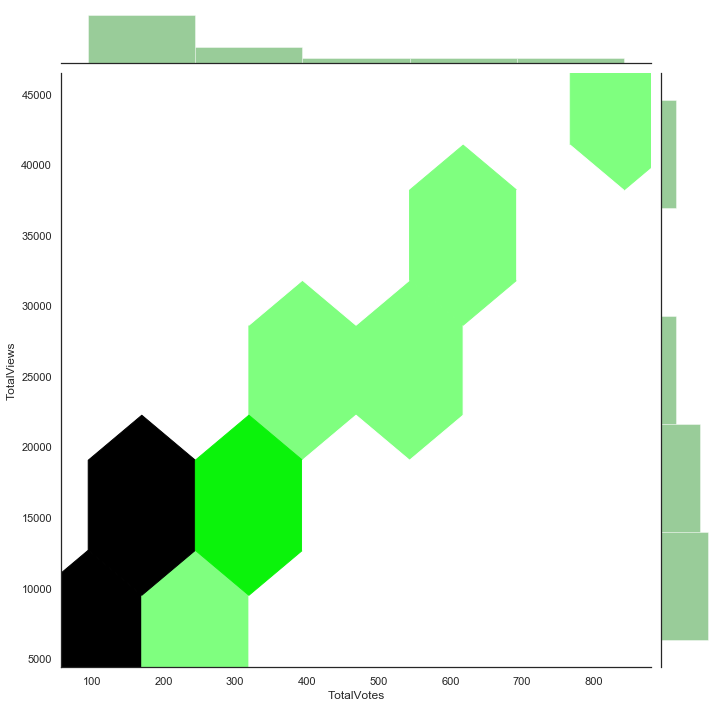

In [85]:
# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.
#command--> 25
sns.jointplot(x="TotalVotes", y="TotalViews", data=yourkernels, size=10,ratio=10, kind='hex',color='green')
plt.show()

##  andrews_curves

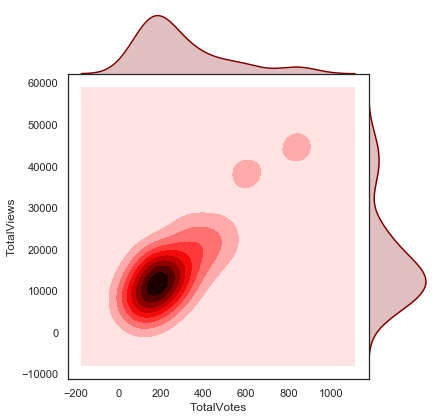

In [86]:
# we will use seaborn jointplot shows bivariate scatterplots and univariate histograms with Kernel density 
# estimation in the same figure
sns.jointplot(x="TotalVotes", y="TotalViews", data=yourkernels, size=6, kind='kde', color='#800000', space=0)

## Heatmap

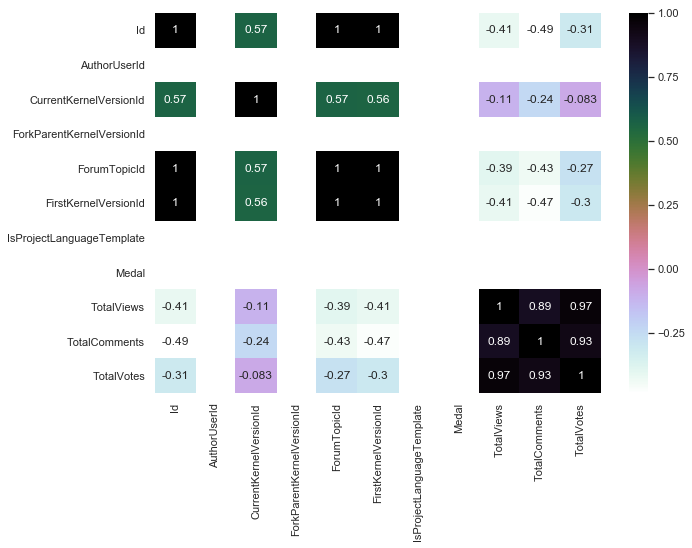

In [87]:
#command--> 26
plt.figure(figsize=(10,7)) 
sns.heatmap(yourkernels.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

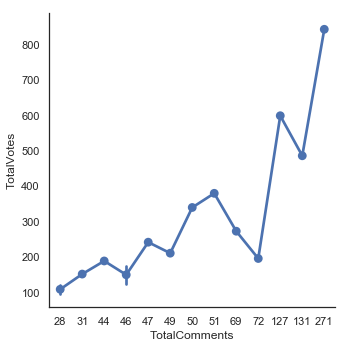

In [88]:
sns.factorplot('TotalComments','TotalVotes',data=yourkernels)
plt.show()

## distplot

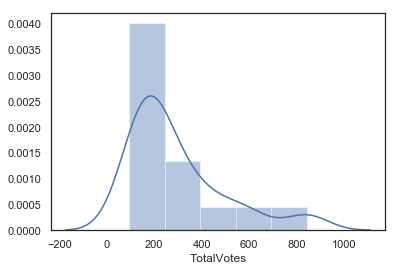

In [89]:
sns.distplot(yourkernels['TotalVotes']);

## Plotly
How to use **Plotly** offline inside IPython notebooks.


## New to Plotly?
Plotly, also known by its URL, Plot.ly, is a technical computing company headquartered in Montreal, Quebec, that develops online data analytics and visualization tools. 
Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST.

In [90]:
# example for plotly
py.init_notebook_mode(connected=True)
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
trace = go.Scatter(x=X[:, 0],
                   y=X[:, 1],
                   mode='markers',
                   marker=dict(color=np.random.randn(150),
                               size=10,
                               colorscale='Viridis',
                               showscale=False))

layout = go.Layout(title='Training Points',
                   xaxis=dict(title='Sepal length',
                            showgrid=False),
                   yaxis=dict(title='Sepal width',
                            showgrid=False),
                  )
 
fig = go.Figure(data=[trace], layout=layout)

In [105]:
py.iplot(fig)

In [92]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=3).fit_transform(iris.data)

In [93]:
trace = go.Scatter3d(x=X_reduced[:, 0], 
                     y=X_reduced[:, 1], 
                     z=X_reduced[:, 2],
                     mode='markers',
                     marker=dict(
                         size=6,
                         color=np.random.randn(150),
                         colorscale='Viridis',   
                         opacity=0.8)
                    )
layout=go.Layout(title='First three PCA directions',
                 scene=dict(
                         xaxis=dict(title='1st eigenvector'),
                         yaxis=dict(title='2nd eigenvector'),
                         zaxis=dict(title='3rd eigenvector'))
                 )
fig = go.Figure(data=[trace], layout=layout)

In [94]:
py.iplot(fig)


## Plotly Offline from Command Line
You can plot your graphs from a python script from command line. 
On executing the script, it will open a web browser with your Plotly Graph drawn.

In [95]:
plot([go.Scatter(x=[1, 2, 3], y=[3, 1, 6])])

'temp-plot.html'

In [96]:
np.random.seed(5)

fig = tools.make_subplots(rows=2, cols=3,
                          print_grid=False,
                          specs=[[{'is_3d': True}, {'is_3d': True}, {'is_3d': True}],
                                 [ {'is_3d': True, 'rowspan':1}, None, None]])
scene = dict(
    camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=2.5, y=0.1, z=0.1)
    ),
    xaxis=dict(
        range=[-1, 4],
        title='Petal width',
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        showbackground=True,
        backgroundcolor='rgb(230, 230,230)',
        showticklabels=False, ticks=''
    ),
    yaxis=dict(
        range=[4, 8],
        title='Sepal length',
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        showbackground=True,
        backgroundcolor='rgb(230, 230,230)',
        showticklabels=False, ticks=''
    ),
    zaxis=dict(
        range=[1,8],
        title='Petal length',
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        showbackground=True,
        backgroundcolor='rgb(230, 230,230)',
        showticklabels=False, ticks=''
    )
)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}
fignum = 1
for name, est in estimators.items():
    est.fit(X)
    labels = est.labels_

    trace = go.Scatter3d(x=X[:, 3], y=X[:, 0], z=X[:, 2],
                         showlegend=False,
                         mode='markers',
                         marker=dict(
                                color=labels.astype(np.float),
                                line=dict(color='black', width=1)
        ))
    fig.append_trace(trace, 1, fignum)
    
    fignum = fignum + 1

y = np.choose(y, [1, 2, 0]).astype(np.float)

trace1 = go.Scatter3d(x=X[:, 3], y=X[:, 0], z=X[:, 2],
                      showlegend=False,
                      mode='markers',
                      marker=dict(
                            color=y,
                            line=dict(color='black', width=1)))
fig.append_trace(trace1, 2, 1)

fig['layout'].update(height=900, width=900,
                     margin=dict(l=10,r=10))


Layout({
    'height': 900,
    'margin': {'l': 10, 'r': 10},
    'scene': {'domain': {'x': [0.0, 0.2888888888888889], 'y': [0.575, 1.0]}},
    'scene2': {'domain': {'x': [0.35555555555555557, 0.6444444444444445], 'y': [0.575, 1.0]}},
    'scene3': {'domain': {'x': [0.7111111111111111, 1.0], 'y': [0.575, 1.0]}},
    'scene4': {'domain': {'x': [0.0, 0.2888888888888889], 'y': [0.0, 0.425]}},
    'width': 900
})

In [97]:
py.iplot(fig)

# Bokeh
**Bokeh** is a large library that exposes many capabilities, so this section is only a quick tour of some common Bokeh use cases and workflows. 
For more detailed information please consult the full User Guide.

Let’s begin with some examples. 
Plotting data in basic Python lists as a line plot including zoom, pan, save, and other tools is simple and straightforward:

In [98]:
output_notebook()

Loading BokehJS ...

In [99]:

x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

In [100]:
# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]



# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
show(p)

When you execute this script, you will see that a new output file "lines.html" is created, and that a browser automatically opens a new tab to display it. (For presentation purposes we have included the plot output directly inline in this document.)

The basic steps to creating plots with the bokeh.plotting interface are:

Prepare some data
In this case plain python lists, but could also be NumPy arrays or Pandas series.
Tell Bokeh where to generate output
In this case using output_file(), with the filename "lines.html". Another option is output_notebook() for use in Jupyter notebooks.
Call figure()
This creates a plot with typical default options and easy customization of title, tools, and axes labels.
Add renderers
In this case, we use line() for our data, specifying visual customizations like colors, legends and widths.
Ask Bokeh to show() or save() the results.
These functions save the plot to an HTML file and optionally display it in a browser.
Steps three and four can be repeated to create more than one plot, as shown in some of the examples below.

The bokeh.plotting interface is also quite handy if we need to customize the output a bit more by adding more data series, glyphs, logarithmic axis, and so on. It’s also possible to easily combine multiple glyphs together on one plot as shown below:

In [101]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]



# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

# add some renderers
p.line(x, x, legend="y=x")
p.circle(x, x, legend="y=x", fill_color="white", size=8)
p.line(x, y0, legend="y=x^2", line_width=3)
p.line(x, y1, legend="y=10^x", line_color="red")
p.circle(x, y1, legend="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend="y=10^x^2", line_color="orange", line_dash="4 4")

# show the results
show(p)

In [102]:
# bokeh basics
# Create a blank figure with labels
p = figure(plot_width = 600, plot_height = 600, 
           title = 'Example Glyphs',
           x_axis_label = 'X', y_axis_label = 'Y')

# Example data
squares_x = [1, 3, 4, 5, 8]
squares_y = [8, 7, 3, 1, 10]
circles_x = [9, 12, 4, 3, 15]
circles_y = [8, 4, 11, 6, 10]

# Add squares glyph
p.square(squares_x, squares_y, size = 12, color = 'navy', alpha = 0.6)
# Add circle glyph
p.circle(circles_x, circles_y, size = 12, color = 'red')

# Set to output the plot in the notebook
output_notebook()
# Show the plot
show(p)

Loading BokehJS ...

# NetworkX
**NetworkX** is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

(0, 0) (1, 0) (0, 1)
(0, 1) (1, 1) (0, 2)
(0, 2) (1, 2) (0, 3)
(0, 3) (1, 3) (0, 4)
(0, 4) (1, 4)
(1, 0) (2, 0) (1, 1)
(1, 1) (2, 1) (1, 2)
(1, 2) (2, 2) (1, 3)
(1, 3) (2, 3) (1, 4)
(1, 4) (2, 4)
(2, 0) (3, 0) (2, 1)
(2, 1) (3, 1) (2, 2)
(2, 2) (3, 2) (2, 3)
(2, 3) (3, 3) (2, 4)
(2, 4) (3, 4)
(3, 0) (4, 0) (3, 1)
(3, 1) (4, 1) (3, 2)
(3, 2) (4, 2) (3, 3)
(3, 3) (4, 3) (3, 4)
(3, 4) (4, 4)
(4, 0) (4, 1)
(4, 1) (4, 2)
(4, 2) (4, 3)
(4, 3) (4, 4)
(4, 4)


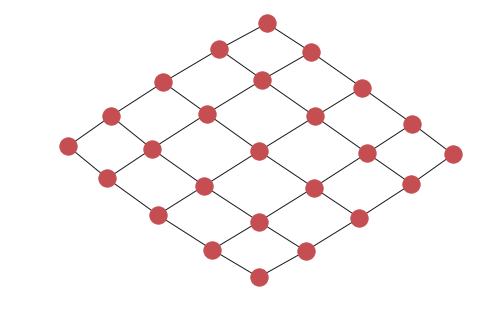

In [103]:
import sys
import matplotlib.pyplot as plt
import networkx as nx
G = nx.grid_2d_graph(5, 5)  # 5x5 grid

# print the adjacency list
for line in nx.generate_adjlist(G):
    print(line)
# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")
nx.draw(H)
plt.show()

In [104]:
from ipywidgets import interact
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
# wrap a few graph generation functions so they have the same signature
def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()
    
interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
         generator={
             'lobster': random_lobster,
             'power law': powerlaw_cluster,
             'Newman-Watts-Strogatz': newman_watts_strogatz,
             u'Erdős-Rényi': erdos_renyi,
         });

interactive(children=(IntSlider(value=16, description='n', max=30, min=2), IntSlider(value=5, description='m',…